# <center><font color=maroon> Image Classification Using Transfer Learning (on Colab)</font></center>

### This Notebook is executed on Google Colab environment with the runtime option being T4-GPU. You can modify it to run on your computer.

### We use the popular `VGG-16`, that was trained successfully on ImageNet, to explore the principles of transfer learning.

### The Cats & Dogs Dataset

* #### You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats
* #### Download train.zip and unzip the 25000 files and move them to a folder and make a note of the file path

### Make sure to mount your Google Drive where your Jupyter Notebook files and dataset reside

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Toolsets

In [3]:
import os, itertools
import time
import random, shutil  # shutil is a utility for file system operations
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split

### Import TensorFlow and Keras

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

### Load CNN Modules

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

### Image Preprocessing tool

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

### Keras Pre-trained model

In [8]:
from keras.applications.vgg16 import VGG16

<a name='1'></a>
## <font color= blue> Load and Process the Dataset</font>

### The data files are stored in the following sub-directory structure:
<img src="./images/train_test_dir.png" alt="Drawing" style="width: 200px;"/>

### Use Keras ImageDataGenerator API to create image data pipeline

In [18]:
train_sub_path = '/content/drive/MyDrive/Colab Notebooks/cat_dog_6000'

In [19]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = datagen.flow_from_directory(train_sub_path + '/train',
            class_mode='binary', batch_size=64, target_size=(64, 64))

val_data = datagen.flow_from_directory(train_sub_path + '/validation',
           class_mode='binary', batch_size=64, target_size=(64, 64))

test_data = datagen.flow_from_directory(train_sub_path + '/test',
            class_mode='binary', batch_size=64, target_size=(64, 64))

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2080 images belonging to 2 classes.


<a name='3'></a>
## <font color= blue> Transfer Learning With VGG-16 </font>

<a name='3-1'></a>
### <font color=blue> Define the CNN Model </font>
* #### We will `freeze` the convolutional base of VGG-16 and `train` a new cat-dog classifier  

In [23]:
# Load the VGG-16 model with pre-trained weights on ImageNet

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))    # include_top=False: FC layers are NOT frozen

# Freeze the convolutional layers

for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the VGG-16 base model

model = Sequential()
model.add(base_model)

model.add(Flatten())

# FC Layers for new classifier

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14977089 (57.13 MB)
Trainable params: 262401 (1.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


<a name='2-2'></a>
## <font color=blue> Train and Fit the Model </font>

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_data, epochs=20, validation_data = val_data, verbose=1)

Epoch 1/20
47/47 [==============================] - 12s 225ms/step - loss: 0.5301 - accuracy: 0.7270 - val_loss: 0.4865 - val_accuracy: 0.7720
Epoch 2/20
47/47 [==============================] - 11s 224ms/step - loss: 0.4094 - accuracy: 0.8073 - val_loss: 0.4518 - val_accuracy: 0.7830
Epoch 3/20
47/47 [==============================] - 11s 228ms/step - loss: 0.3757 - accuracy: 0.8280 - val_loss: 0.4768 - val_accuracy: 0.7660
Epoch 4/20
47/47 [==============================] - 11s 229ms/step - loss: 0.3343 - accuracy: 0.8603 - val_loss: 0.5055 - val_accuracy: 0.7730
Epoch 5/20
47/47 [==============================] - 13s 274ms/step - loss: 0.3090 - accuracy: 0.8723 - val_loss: 0.4745 - val_accuracy: 0.7710
Epoch 6/20
47/47 [==============================] - 11s 224ms/step - loss: 0.2702 - accuracy: 0.8893 - val_loss: 0.5502 - val_accuracy: 0.7670
Epoch 7/20
47/47 [==============================] - 10s 216ms/step - loss: 0.2580 - accuracy: 0.8913 - val_loss: 0.4950 - val_accuracy: 0.7740

### Compare Loss and Accuracy Performance for train and validation data

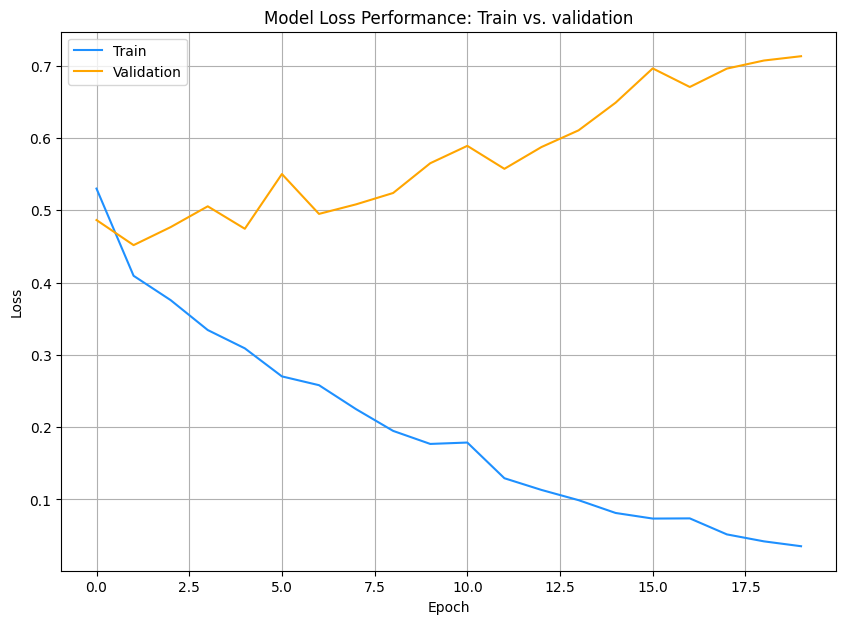

In [25]:
J = history.history['loss']  # Loss data for Training
J_val = history.history['val_loss']

plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

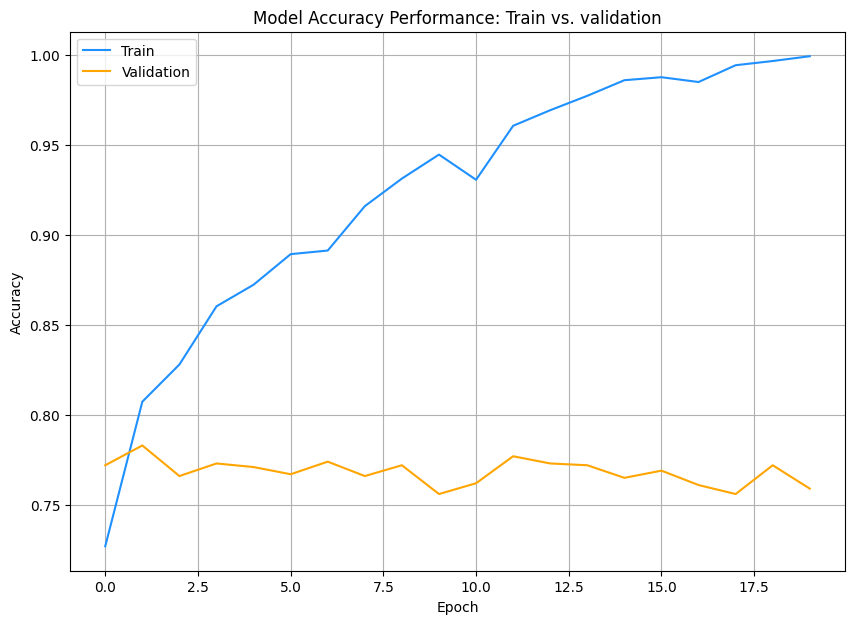

In [26]:
accu = history.history['accuracy']  # Loss data for Training
accu_val = history.history['val_accuracy']

plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

#### <font color=maroon> Notice that the accuracy on train data continues to improve till it reaches 100%. </font>
####  <font color=maroon>However, the accuracy on the validation data plateaus stay between `75% to 78%` at all times.</font>
#### <font color=maroon>The image size does seem to be a limiting factor in this case. We can try to increase the image size, or by adding depth to the CNN model, or adding image augmentation</font>

<a name='2-3'></a>
### <font color=blue> Test and Evaluate the Model </font>

In [ ]:
loss, accuracy = model.evaluate(test_data, verbose=1)

y_pred = model.predict(test_data)

32/33 [============================>.] - ETA: 19s - loss: 0.6947 - accuracy: 0.7705

#### <font color=maroon> Evaluation on the test data confirms the accuracy is `77%`. This is NOT much different from the baseline model.</font>

### Predicted target output, Y (Cat or Dog)

In [ ]:
Y_pred = np.rint(y_pred)    # Binary decision on the image. 1 = Dog, 0 = Cat

y_pred[0], Y_pred[0]

(array([0.99994653], dtype=float32), array([1.], dtype=float32))

## <font color=blue> Change image size to $224 \times 224$</font>

In [13]:
train_sub_path = '/content/drive/MyDrive/Colab Notebooks/cat_dog_6000'

In [14]:
# create data generator
n_w = 224
n_h = 224

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = datagen.flow_from_directory(train_sub_path + '/train',
            class_mode='binary', batch_size=64, target_size=(n_h, n_w))

val_data = datagen.flow_from_directory(train_sub_path + '/validation',
           class_mode='binary', batch_size=64, target_size=(n_h, n_w))

test_data = datagen.flow_from_directory(train_sub_path + '/test',
            class_mode='binary', batch_size=64, target_size=(n_h, n_w))

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2080 images belonging to 2 classes.


In [17]:
# Load the VGG-16 model with pre-trained weights on ImageNet

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(n_h, n_w, 3))    # include_top=False: FC layers are NOT frozen

# Freeze the convolutional layers

for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the VGG-16 base model

model = Sequential()
model.add(base_model)

model.add(Flatten())

# FC Layers for new classifier

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 3211521 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_data, epochs=10, validation_data = val_data, verbose=1)

Epoch 1/10
47/47 [==============================] - 21s 413ms/step - loss: 0.7877 - accuracy: 0.7587 - val_loss: 0.2972 - val_accuracy: 0.8660
Epoch 2/10
47/47 [==============================] - 19s 393ms/step - loss: 0.1977 - accuracy: 0.9270 - val_loss: 0.2333 - val_accuracy: 0.8950
Epoch 3/10
47/47 [==============================] - 18s 379ms/step - loss: 0.1333 - accuracy: 0.9563 - val_loss: 0.2072 - val_accuracy: 0.9100
Epoch 4/10
47/47 [==============================] - 19s 397ms/step - loss: 0.0989 - accuracy: 0.9720 - val_loss: 0.1925 - val_accuracy: 0.9180
Epoch 5/10
47/47 [==============================] - 19s 404ms/step - loss: 0.0669 - accuracy: 0.9873 - val_loss: 0.2053 - val_accuracy: 0.9080
Epoch 6/10
47/47 [==============================] - 19s 398ms/step - loss: 0.0531 - accuracy: 0.9913 - val_loss: 0.1918 - val_accuracy: 0.9230
Epoch 7/10
47/47 [==============================] - 18s 385ms/step - loss: 0.0341 - accuracy: 0.9963 - val_loss: 0.1905 - val_accuracy: 0.9200

### Compare Loss and Accuracy Performance for train and validation data

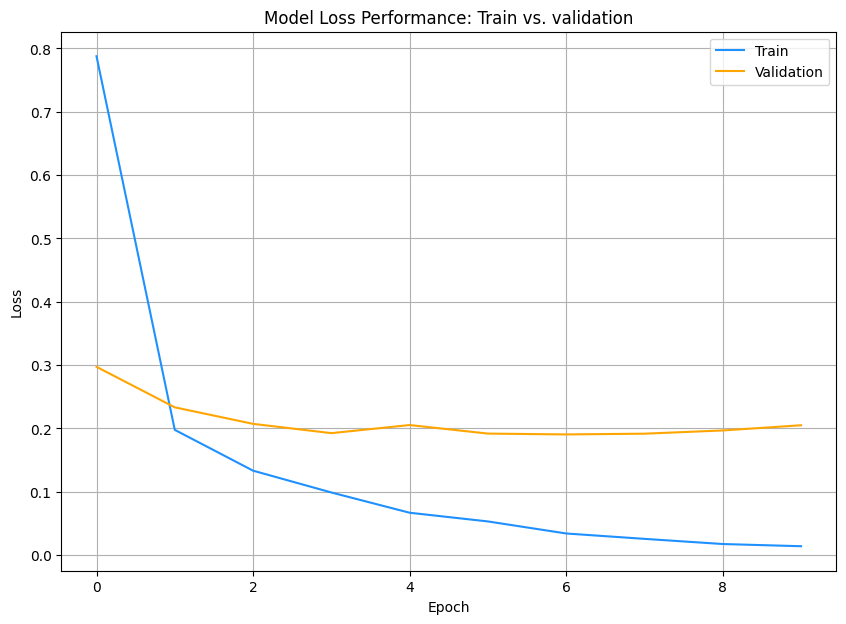

In [20]:
J = history.history['loss']  # Loss data for Training
J_val = history.history['val_loss']

plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

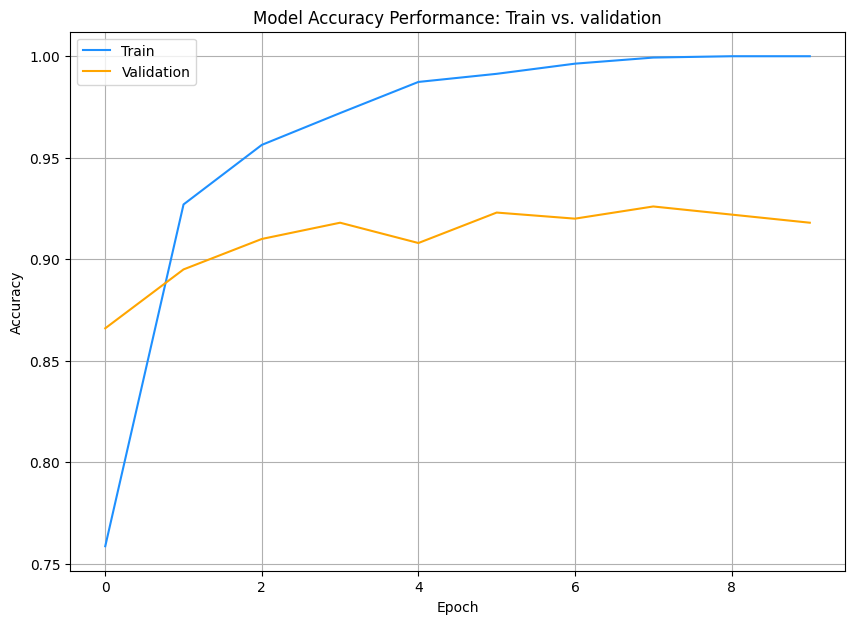

In [21]:
accu = history.history['accuracy']  # Loss data for Training
accu_val = history.history['val_accuracy']

plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

#### <font color=maroon> Notice that the accuracy on train data continues to improve till it reaches 100%. </font>
####  <font color=maroon>However, the accuracy on the validation data plateaus stay between `92%` at all times. This is a great improvement over the smaller $64 \times 64$ image.</font>

## <font color=blue> Test and Evaluate the Model </font>

In [22]:
loss, accuracy = model.evaluate(test_data, verbose=1)

33/33 [==============================] - 548s 17s/step - loss: 0.2232 - accuracy: 0.9187
